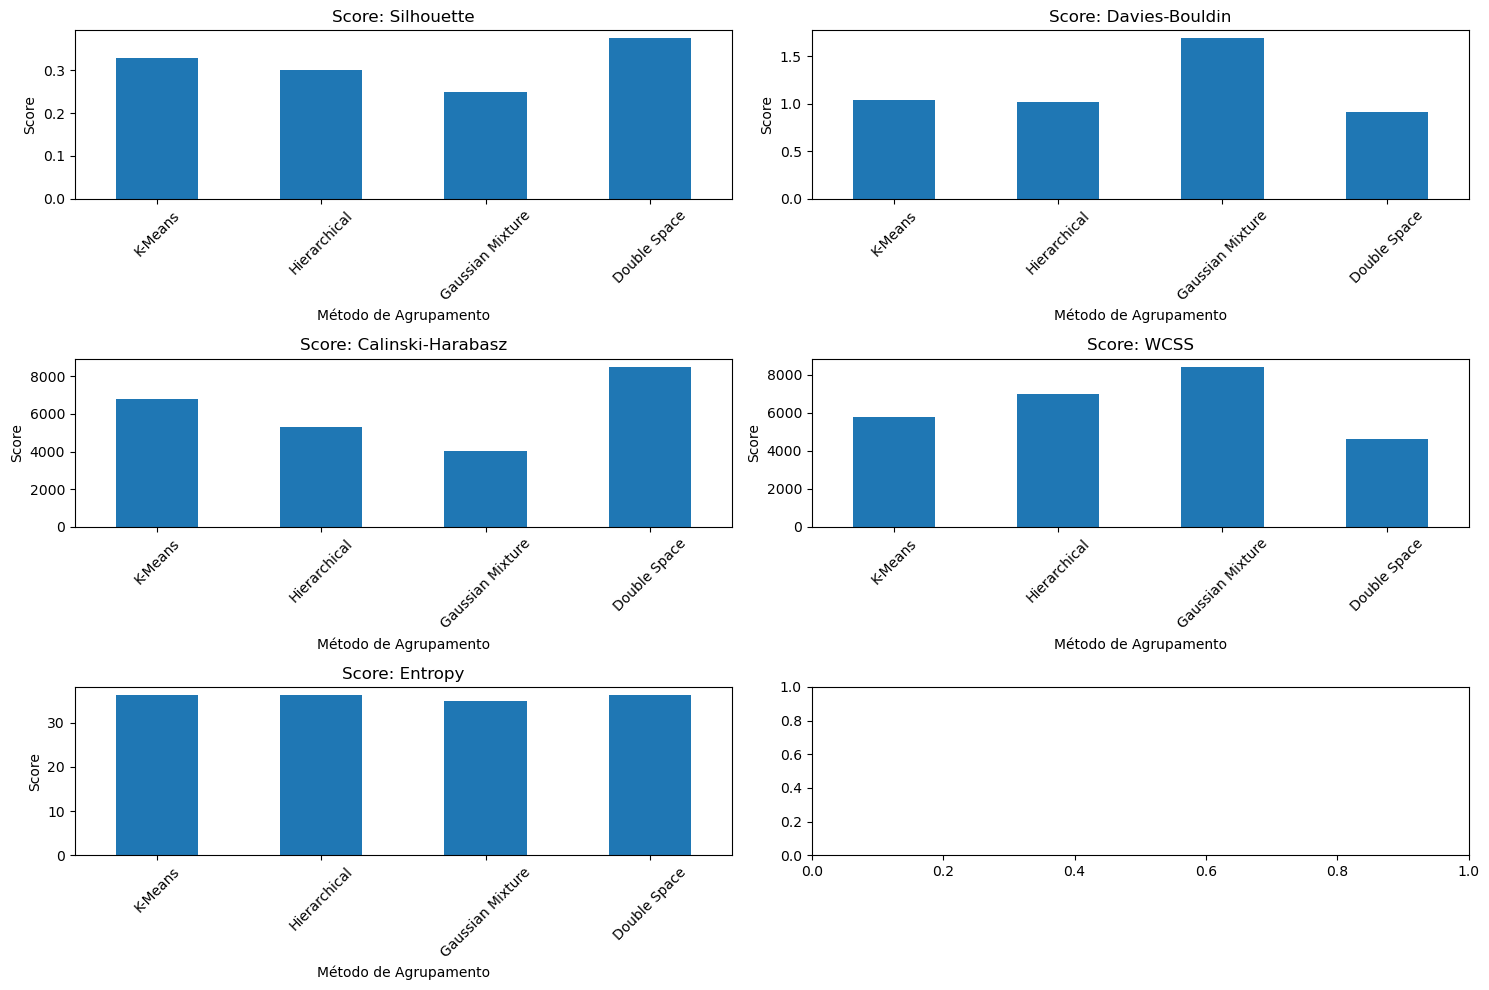

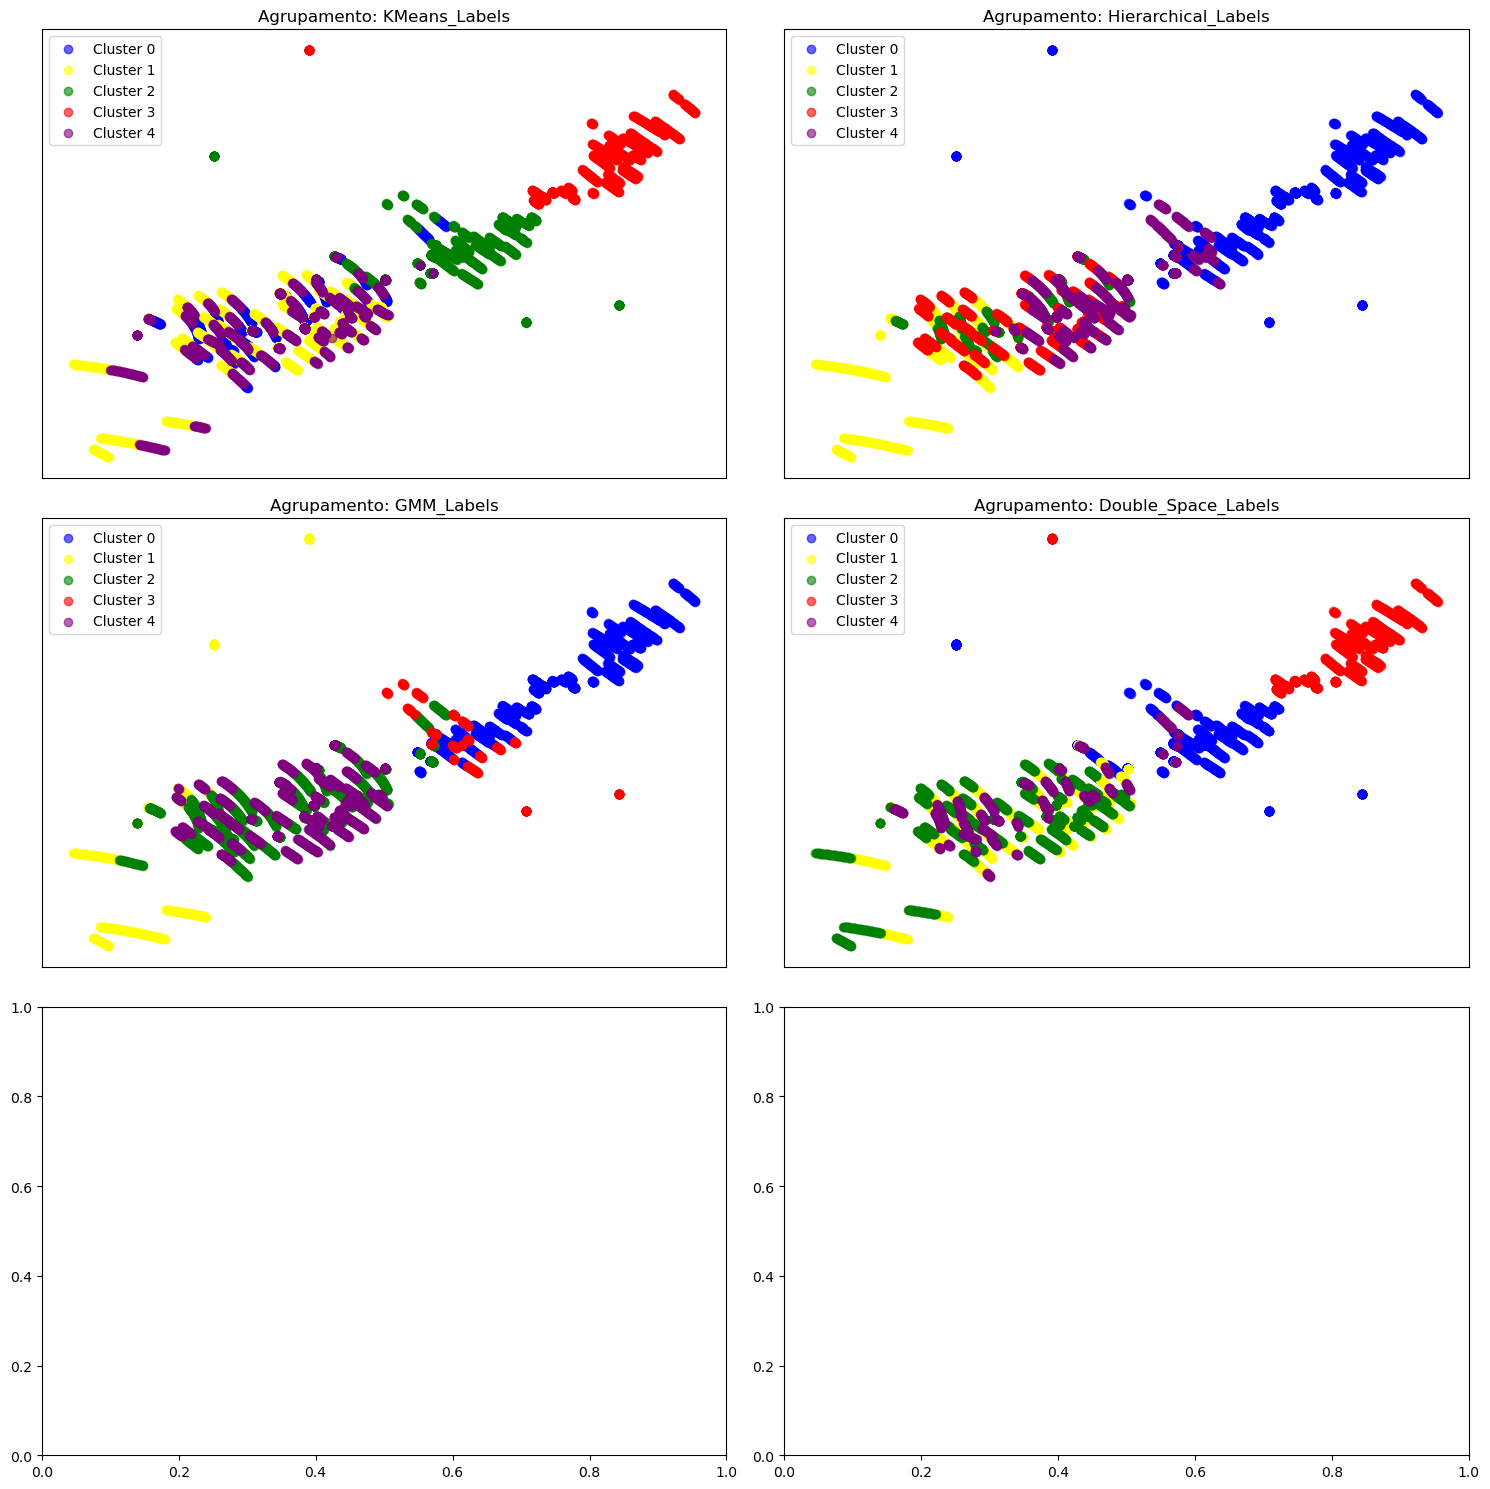

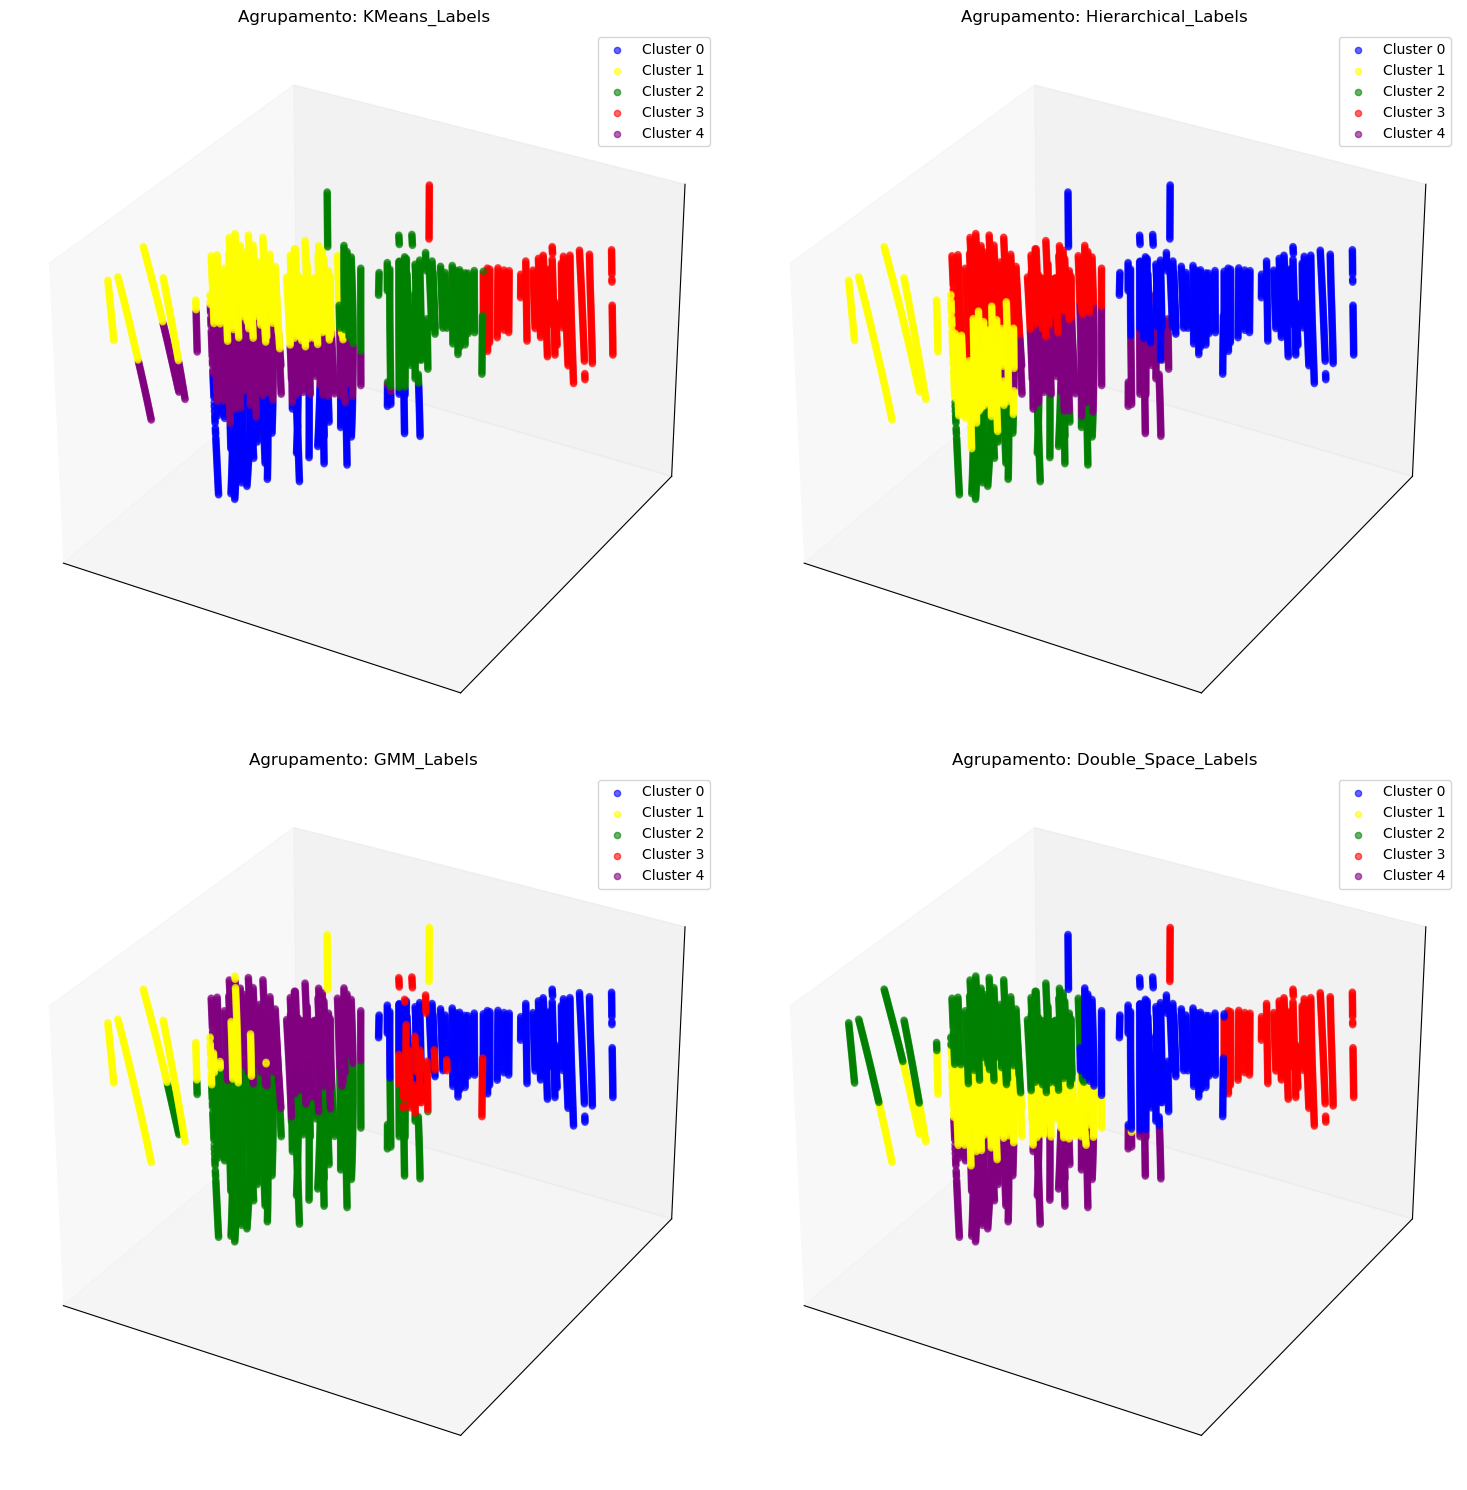

Resultados dos métodos de agrupamento:

K-Means:
Silhouette: 0.3302421359572167
Davies-Bouldin: 1.0354881632392376
Calinski-Harabasz: 6785.177384084937
WCSS: 5771.783399076918
Entropy: 36.31922480787739

Hierarchical:
Silhouette: 0.3001507907996168
Davies-Bouldin: 1.0227015040435796
Calinski-Harabasz: 5282.305654704464
WCSS: 6952.828312668672
Entropy: 36.26470776498916

Gaussian Mixture:
Silhouette: 0.24958045963400008
Davies-Bouldin: 1.6900441609330172
Calinski-Harabasz: 4007.0595275747405
WCSS: 8413.713992999374
Entropy: 34.956435857133386

Double Space:
Silhouette: 0.37529697159905645
Davies-Bouldin: 0.9110725001793993
Calinski-Harabasz: 8513.577134488854
WCSS: 4593.291715548335
Entropy: 36.250085107327735

Melhor método de agrupamento: Double Space
Dataset com valores de agrupamento salvo em: D:\python\hochschild\COMPOSITE_2_5_NORMALIZADO_with_clusters_iso.csv
Scores de avaliação salvos em: D:\python\hochschild\clustering_evaluation_scores_iso.csv


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Carregar o dataset
file_path = r'D:\python\hochschild\COMPOSITE_2_5_NORMALIZADO_with_clusters_Iso.csv'
data = pd.read_csv(file_path)

# Selecionar as variáveis numéricas e as coordenadas
X = data[['mid_x', 'mid_y', 'mid_z']]

# Pré-processamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Função para calcular WCSS
def calculate_wcss(data, labels):
    clusters = np.unique(labels)
    wcss = 0
    for cluster in clusters:
        cluster_points = data[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

# Função para calcular a entropia espacial
def calculate_entropy(data, labels):
    clusters = np.unique(labels)
    entropy = 0
    for cluster in clusters:
        cluster_points = data[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        cluster_size = len(cluster_points)
        if cluster_size > 1:
            distances = cdist(cluster_points, [centroid], 'euclidean')
            probabilities = distances / np.sum(distances)
            entropy -= np.sum(probabilities * np.log(probabilities))
    return entropy

# Dicionário para armazenar os resultados
results = {}

# K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
results['K-Means'] = {
    'Silhouette': silhouette_score(X_scaled, kmeans_labels),
    'Davies-Bouldin': davies_bouldin_score(X_scaled, kmeans_labels),
    'Calinski-Harabasz': calinski_harabasz_score(X_scaled, kmeans_labels),
    'WCSS': calculate_wcss(X_scaled, kmeans_labels),
    'Entropy': calculate_entropy(X_scaled, kmeans_labels)
}
data['KMeans_Labels'] = kmeans_labels

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
results['Hierarchical'] = {
    'Silhouette': silhouette_score(X_scaled, hierarchical_labels),
    'Davies-Bouldin': davies_bouldin_score(X_scaled, hierarchical_labels),
    'Calinski-Harabasz': calinski_harabasz_score(X_scaled, hierarchical_labels),
    'WCSS': calculate_wcss(X_scaled, hierarchical_labels),
    'Entropy': calculate_entropy(X_scaled, hierarchical_labels)
}
data['Hierarchical_Labels'] = hierarchical_labels

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
results['Gaussian Mixture'] = {
    'Silhouette': silhouette_score(X_scaled, gmm_labels),
    'Davies-Bouldin': davies_bouldin_score(X_scaled, gmm_labels),
    'Calinski-Harabasz': calinski_harabasz_score(X_scaled, gmm_labels),
    'WCSS': calculate_wcss(X_scaled, gmm_labels),
    'Entropy': calculate_entropy(X_scaled, gmm_labels)
}
data['GMM_Labels'] = gmm_labels

# Agrupamento em Espaço Duplo (Exemplo Simples)
# Aqui, vamos usar K-Means em um espaço transformado como exemplo
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
double_space_kmeans = KMeans(n_clusters=5, random_state=42)
double_space_labels = double_space_kmeans.fit_predict(X_pca)

results['Double Space'] = {
    'Silhouette': silhouette_score(X_pca, double_space_labels),
    'Davies-Bouldin': davies_bouldin_score(X_pca, double_space_labels),
    'Calinski-Harabasz': calinski_harabasz_score(X_pca, double_space_labels),
    'WCSS': calculate_wcss(X_pca, double_space_labels),
    'Entropy': calculate_entropy(X_pca, double_space_labels)
}
data['Double_Space_Labels'] = double_space_labels

# Avaliação dos resultados
best_method = min(results, key=lambda k: results[k]['Davies-Bouldin'])

# Exportar o dataset com os valores de agrupamento
output_file_path = os.path.join(os.path.dirname(file_path), 'COMPOSITE_2_5_NORMALIZADO_with_clusters_iso.csv')
data.to_csv(output_file_path, index=False)

# Exportar os scores de avaliação
scores_df = pd.DataFrame(results).T
scores_file_path = os.path.join(os.path.dirname(file_path), 'clustering_evaluation_scores_iso.csv')
scores_df.to_csv(scores_file_path)

# Plotar scores de avaliação em gráficos separados
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
metrics = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz', 'WCSS', 'Entropy']
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    scores_df[metric].plot(kind='bar', ax=ax)
    ax.set_title(f'Score: {metric}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Método de Agrupamento')
    ax.set_xticklabels(scores_df.index, rotation=45)

plt.tight_layout()
plt.show()

# Plotar os agrupamentos em gráficos 2D usando mid_x e mid_y
colors = ['blue', 'yellow', 'green', 'red', 'purple']
methods = ['KMeans_Labels', 'Hierarchical_Labels', 'GMM_Labels', 'Double_Space_Labels']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, method in enumerate(methods):
    ax = axes[i//2, i%2]
    labels = data[method]
    for label in np.unique(labels):
        ax.scatter(data['mid_x'][labels == label], data['mid_y'][labels == label], c=colors[label], label=f'Cluster {label}', alpha=0.6)
    ax.set_title(f'Agrupamento: {method}')
    ax.legend()
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

# Plotar os agrupamentos em gráficos 3D
fig = plt.figure(figsize=(15, 15))
methods = ['KMeans_Labels', 'Hierarchical_Labels', 'GMM_Labels', 'Double_Space_Labels']

for i, method in enumerate(methods):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    labels = data[method]
    for label in np.unique(labels):
        ax.scatter(data['mid_x'][labels == label], data['mid_y'][labels == label], data['mid_z'][labels == label], c=colors[label], label=f'Cluster {label}', alpha=0.6)
    ax.set_title(f'Agrupamento: {method}')
    ax.legend()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

plt.tight_layout()
plt.show()

print("Resultados dos métodos de agrupamento:")
for method, scores in results.items():
    print(f"\n{method}:")
    for metric, score in scores.items():
        print(f"{metric}: {score}")

print(f"\nMelhor método de agrupamento: {best_method}")
print(f"Dataset com valores de agrupamento salvo em: {output_file_path}")
print(f"Scores de avaliação salvos em: {scores_file_path}")


